# Application of Explainable Machine Learning on Prediction

## Dataset: Abalone

*   8 Features
*   4177 Observations
*   Predict sex: Female (F), Intersex (I), Male (M)



## Loading Packages

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=304679cdc4a0edb97a46f3fde727bd05dfb673ade67a8c1eb214ab5004e6c31d
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 3.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from scipy.stats import uniform, randint
from sklearn.metrics import log_loss, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import lime
import lime.lime_tabular
import shap

import warnings
warnings.filterwarnings('ignore')

## Data Cleaning

In [ ]:
# Load the data
abalone = pd.read_csv('abalone.csv')
abalone.head()

Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7

There's no missing value.

In [ ]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [ ]:
abalone.describe()

Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera weight  Shell weight        Rings  
count     4177.000000   4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684  
std          0.109614      0.139203     3.224169  
min          0.000500      0.001500     1.000000  
25%          0.093500      0.130000     8.000000  
50%          0.171000      0.234000     9.000000  
75%          0.253000      0.329000    11.000000  
max          0.760000      1.005000    29.000000

In [ ]:
# Check missing data
abalone.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [ ]:
# Encode the 'Sex' variable
label_encoder = LabelEncoder()
abalone['Sex'] = label_encoder.fit_transform(abalone['Sex'])

# Again make sure there's no missing value
assert abalone.isna().sum().sum() == 0

# Display the data
abalone.head()

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0    2   0.455     0.365   0.095        0.5140          0.2245   
1    2   0.350     0.265   0.090        0.2255          0.0995   
2    0   0.530     0.420   0.135        0.6770          0.2565   
3    2   0.440     0.365   0.125        0.5160          0.2155   
4    1   0.330     0.255   0.080        0.2050          0.0895   

   Viscera weight  Shell weight  Rings  
0          0.1010         0.150     15  
1          0.0485         0.070      7  
2          0.1415         0.210      9  
3          0.1140         0.155     10  
4          0.0395         0.055      7

## Data Visualization

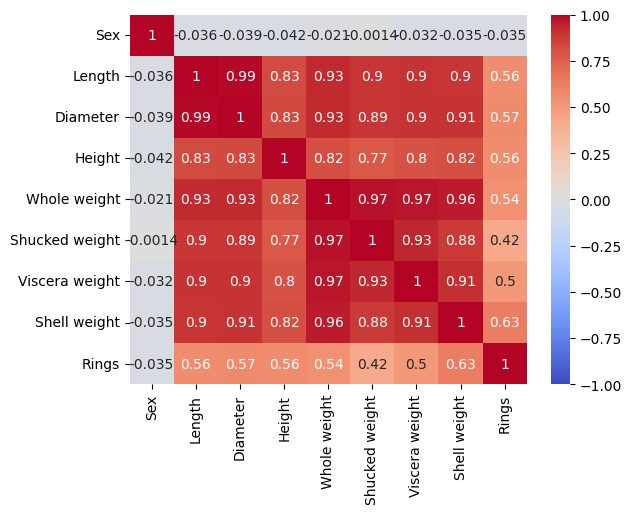

In [ ]:
# Correlation Map
corr = abalone.corr()
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.show()

Overall, the heatmap indicates that the physical size and weight measurements of abalones are highly interrelated, while the 'Sex' of the abalone does not have a strong linear relationship with its physical measurements.

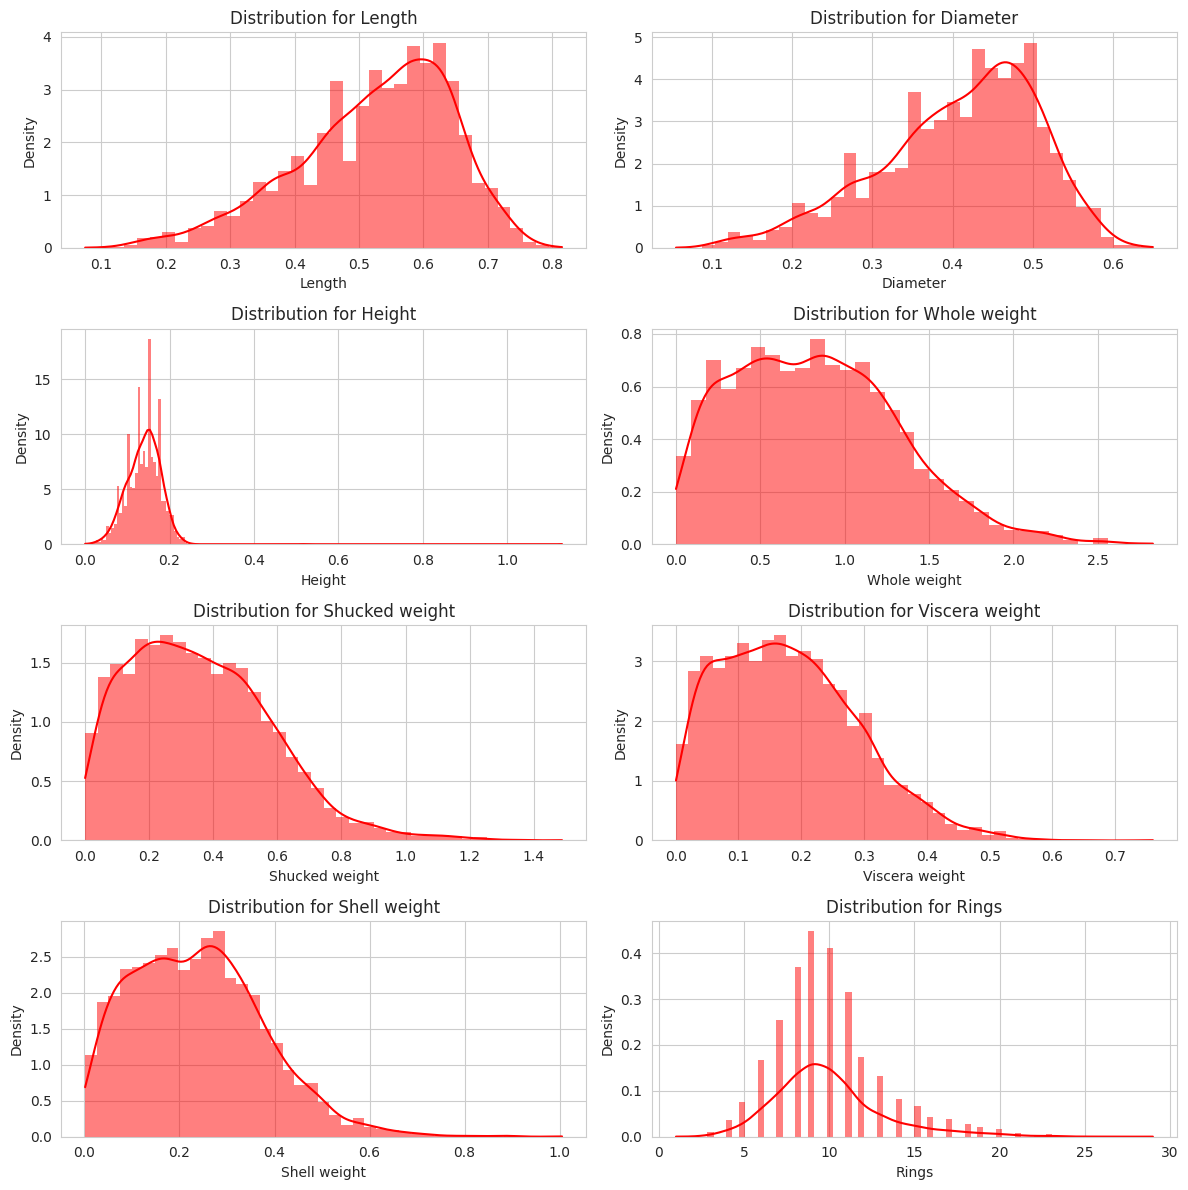

In [ ]:
# Select features
features = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Plot layout
n_rows = 4
n_cols = 2
plt.figure(figsize=(16, 12))

# Loop through the features and create a histogram for each
for i, feature in enumerate(features):
  plt.subplot(n_rows, n_cols, i + 1)
  sns.histplot(abalone[feature], kde=True, color='red', stat="density", linewidth=0)
  plt.title(f'Distribution for {feature}')
  plt.xlabel(feature)
  plt.ylabel('Density')

# Display the plots
plt.tight_layout()
plt.show()

For the features 'Length', 'Diameter', 'Whole weight', 'Shucked weight', 'Viscera weight', and 'Shell weight', the histograms show a unimodal distribution with the bulk of the data concentrated around the median. They appear to have a right skew, meaning there's a longer tail on the right side of the peak.

The 'Height' feature shows a highly skewed distribution with several spikes, suggesting outliers or a non-standard distribution of measurements in this feature.

The 'Rings' feature, which typically indicates the age of the abalone, shows a multimodal distribution with several peaks, suggesting there are common age groups or that the age distribution is not smooth.



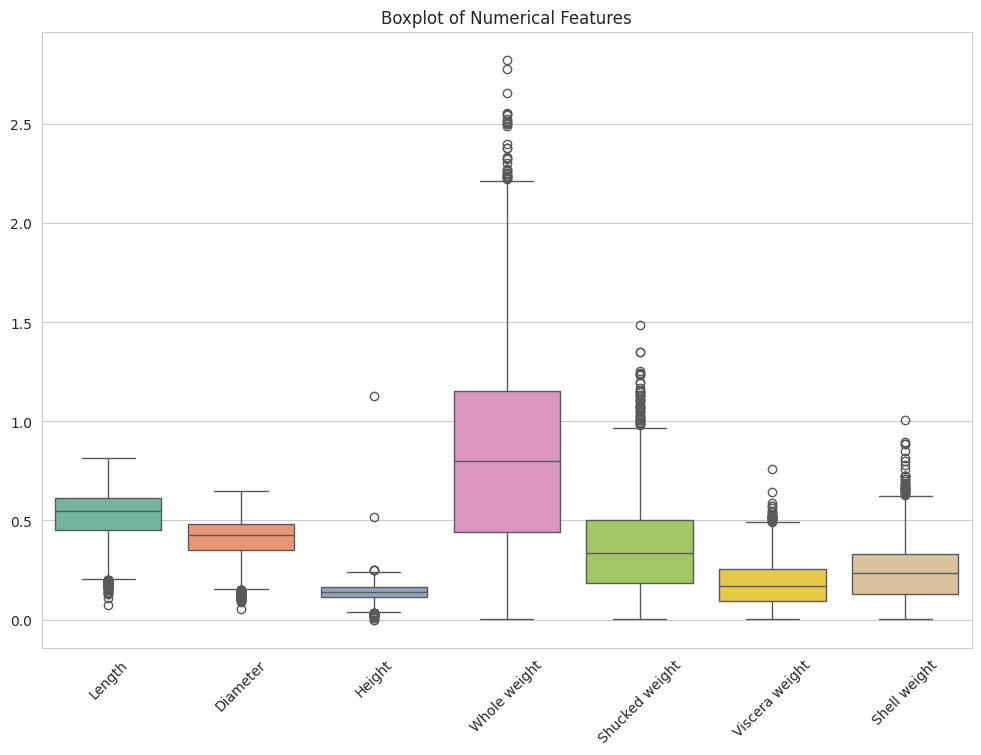

In [ ]:
# Plotting boxplot for all numerical features
plt.figure(figsize=(12, 8))
sns.boxplot(data=abalone[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']], palette="Set2")
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()

Numerical features are distributed over different value ranges, thus standardization is needed.

## Data Preprocessing

In [ ]:
# Identify features and labels
X = abalone.drop('Sex', axis=1)
y = abalone['Sex']

# Split the data
X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the numerical variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_unscaled)
X_test = scaler.transform(X_test_unscaled)

## Model Building & Evaluation

#### Logistic Regression

In [ ]:
# Logistic Regression
lr_model = LogisticRegression(random_state = 42)
lr_model.fit(X_train, y_train)

# Prediction
y_pred_lr = lr_model.predict(X_test)
y_pred_proba_lr = lr_model.predict_proba(X_test)

# Evaluation
lr_report = classification_report(y_test, y_pred_lr, target_names = label_encoder.classes_)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
log_loss_lr = log_loss(y_test, y_pred_proba_lr)

# Results
print('Logistics Regression Evaluation\n')
print(lr_report)
print(f'Accuracy: {accuracy_lr}\nLog Loss: {log_loss_lr}')

Logistics Regression Evaluation

              precision    recall  f1-score   support

           F       0.50      0.38      0.43       262
           I       0.69      0.87      0.76       267
           M       0.52      0.51      0.52       307

    accuracy                           0.58       836
   macro avg       0.57      0.59      0.57       836
weighted avg       0.57      0.58      0.57       836

Accuracy: 0.583732057416268
Log Loss: 0.8332768649019845


#### K-Nearest Neighbors

In [ ]:
# KNN
knn = KNeighborsClassifier()

# Find best n_neighbors by cross-validation
k_grid = {'n_neighbors': range(1, 30),
          'weights': ['uniform', 'distance'],
          'metric': ['euclidean', 'manhattan']
          }
kf = KFold(n_splits=5, shuffle=True, random_state=42)
knn_cv = GridSearchCV(knn, k_grid, cv=kf)

# Train model
knn_cv.fit(X_train, y_train)
knn_model = knn_cv.best_estimator_ # best KNN model

# Prediction
y_pred_knn = knn_model.predict(X_test)
y_pred_proba_knn = knn_model.predict_proba(X_test)

# Evaluation
knn_report = classification_report(y_test, y_pred_knn, target_names = label_encoder.classes_)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
log_loss_knn = log_loss(y_test, y_pred_proba_knn)

# Results
print('K-Nearest Neighbors Evaluation\n')
print(knn_report)
print(f'Accuracy: {accuracy_knn}\nLog Loss: {log_loss_knn}')

K-Nearest Neighbors Evaluation

              precision    recall  f1-score   support

           F       0.44      0.47      0.45       262
           I       0.72      0.82      0.77       267
           M       0.49      0.41      0.45       307

    accuracy                           0.56       836
   macro avg       0.55      0.57      0.56       836
weighted avg       0.55      0.56      0.55       836

Accuracy: 0.5586124401913876
Log Loss: 0.9008369997063297


#### Support Vector Machine

In [ ]:
# Support Vector Machine
svm_model = SVC(probability = True, random_state = 42)
svm_model.fit(X_train, y_train)

# Prediction
y_pred_svm = svm_model.predict(X_test)
y_pred_proba_svm = svm_model.predict_proba(X_test)

# Evaluation
svm_report = classification_report(y_test, y_pred_svm, target_names = label_encoder.classes_)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
log_loss_svm = log_loss(y_test, y_pred_proba_svm)

# Results
print('Support Vector Machine Evaluation\n')
print(svm_report)
print(f'Accuracy: {accuracy_svm}\nLog Loss: {log_loss_svm}')

Support Vector Machine Evaluation

              precision    recall  f1-score   support

           F       0.49      0.29      0.36       262
           I       0.71      0.83      0.76       267
           M       0.48      0.58      0.53       307

    accuracy                           0.57       836
   macro avg       0.56      0.56      0.55       836
weighted avg       0.56      0.57      0.55       836

Accuracy: 0.5669856459330144
Log Loss: 0.8290075794581825


#### Decision Tree

In [ ]:
# Decision Tree
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)

# Prediction
y_pred_dt = dt_model.predict(X_test)
y_pred_proba_dt = dt_model.predict_proba(X_test)

# Evaluation
dt_report = classification_report(y_test, y_pred_dt, target_names = label_encoder.classes_)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
log_loss_dt = log_loss(y_test, y_pred_proba_dt)

# Results
print('Logistics Regression Evaluation\n')
print(dt_report)
print(f'Accuracy: {accuracy_dt}\nLog Loss: {log_loss_dt}')

Logistics Regression Evaluation

              precision    recall  f1-score   support

           F       0.47      0.53      0.50       262
           I       0.71      0.73      0.72       267
           M       0.42      0.36      0.39       307

    accuracy                           0.53       836
   macro avg       0.53      0.54      0.54       836
weighted avg       0.53      0.53      0.53       836

Accuracy: 0.5322966507177034
Log Loss: 0.8517873873843279


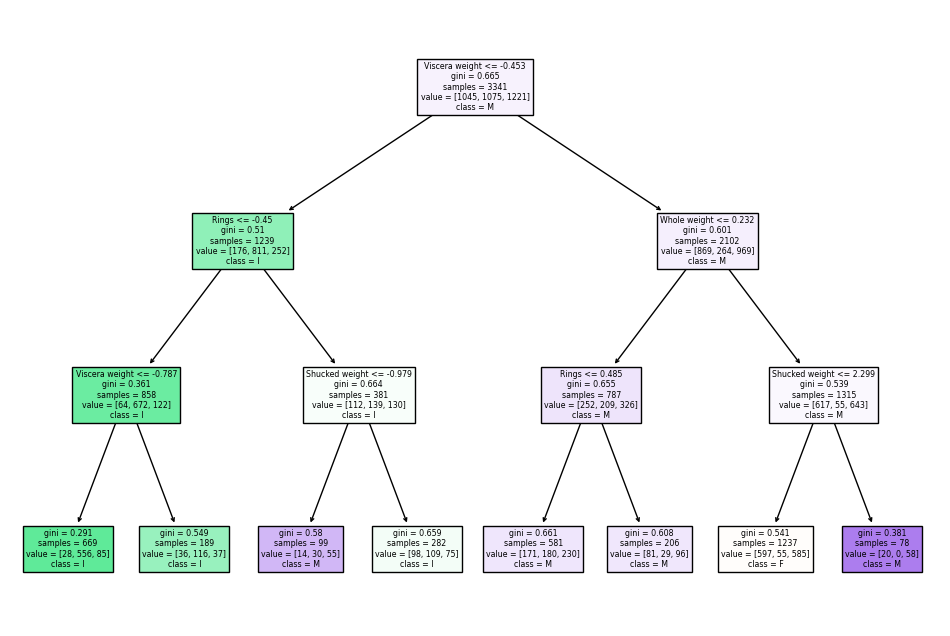

In [ ]:
# Visualize Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt_model, filled=True, feature_names = X.columns.tolist(), class_names = label_encoder.classes_)
plt.show()

#### Random Forest

In [ ]:
# Random Forest
# Find best model through cross validation
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

rf_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
           'max_features': ['auto', 'sqrt'],
           'max_depth': max_depth,
           'min_samples_split': randint(2,20),
           'min_samples_leaf': randint(1,10),
           'bootstrap': [True, False]}

rf_cv = RandomizedSearchCV(estimator = RandomForestClassifier(random_state = 42),
                           param_distributions = rf_grid,
                           n_iter = 100, cv = 3, verbose=2, n_jobs = -1)

# Train model
rf_cv.fit(X_train, y_train)
rf_model = rf_cv.best_estimator_ # best random forest model

# Prediction
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)

# Evaluation
rf_report = classification_report(y_test, y_pred_rf, target_names = label_encoder.classes_)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
log_loss_rf = log_loss(y_test, y_pred_proba_rf)

# Results
print('Random Forest Evaluation (Baseline)\n')
print(rf_report)
print(f'Accuracy: {accuracy_rf}\nLog Loss: {log_loss_rf}')

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Random Forest Evaluation (Baseline)

              precision    recall  f1-score   support

           F       0.44      0.37      0.40       262
           I       0.74      0.79      0.76       267
           M       0.48      0.52      0.50       307

    accuracy                           0.56       836
   macro avg       0.55      0.56      0.55       836
weighted avg       0.55      0.56      0.55       836

Accuracy: 0.5586124401913876
Log Loss: 0.8235090761927593


#### AdaBoost

In [ ]:
# AdaBoost
ab_model = AdaBoostClassifier(random_state = 42)
ab_model.fit(X_train, y_train)

# Prediction
y_pred_ab = ab_model.predict(X_test)
y_pred_proba_ab = ab_model.predict_proba(X_test)

# Evaluation
ab_report = classification_report(y_test, y_pred_ab, target_names = label_encoder.classes_)
accuracy_ab = accuracy_score(y_test, y_pred_ab)
log_loss_ab = log_loss(y_test, y_pred_proba_ab)

# Results
print('AdaBoost Evaluation\n')
print(ab_report)
print(f'Accuracy: {accuracy_ab}\nLog Loss: {log_loss_ab}')

AdaBoost Evaluation

              precision    recall  f1-score   support

           F       0.51      0.29      0.37       262
           I       0.65      0.82      0.73       267
           M       0.50      0.57      0.53       307

    accuracy                           0.56       836
   macro avg       0.55      0.56      0.54       836
weighted avg       0.55      0.56      0.54       836

Accuracy: 0.562200956937799
Log Loss: 1.0665809024885926


#### XGBoost

In [ ]:
# XGBoost
xgb_grid = {
    'n_estimators': randint(50, 500),
    'learning_rate': uniform(0.01, 0.29),
    'max_depth': randint(3, 10),
    'colsample_bytree': uniform(0.5, 1),
    'min_child_weight': randint(1, 5),
    'subsample': uniform(0.5, 0.5),
    'gamma': uniform(0, 0.4),
    'reg_alpha': uniform(0, 40),
    'reg_lambda': uniform(0, 1)
}

xgb_cv = RandomizedSearchCV(
    XGBClassifier(objective='multi:softprob', num_class=3), # multiclass classification
    param_distributions = xgb_grid,
    n_iter = 100,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5,
    verbose = 3,
    random_state = 42
)

# Train model
xgb_cv.fit(X_train, y_train)
xgb_model = xgb_cv.best_estimator_ # best XGBoost model

# Prediction
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)

# Evaluation
xgb_report = classification_report(y_test, y_pred_xgb, target_names = label_encoder.classes_)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
log_loss_xgb = log_loss(y_test, y_pred_proba_xgb)

# Results
print('XGBoost Evaluation\n')
print(xgb_report)
print(f'Accuracy: {accuracy_xgb}\nLog Loss: {log_loss_xgb}')

Fitting 5 folds for each of 100 candidates, totalling 500 fits
XGBoost Evaluation

              precision    recall  f1-score   support

           F       0.45      0.36      0.40       262
           I       0.73      0.79      0.76       267
           M       0.46      0.50      0.48       307

    accuracy                           0.55       836
   macro avg       0.55      0.55      0.55       836
weighted avg       0.54      0.55      0.54       836

Accuracy: 0.5490430622009569
Log Loss: 0.8286330047540904


#### Neural Network

In [ ]:
# Neural Network
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# Categorize for multiclass
num_classes = 3
y_train_categ = to_categorical(y_train, num_classes)
y_test_categ = to_categorical(y_test, num_classes)

# Build model
neural_model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]), # add layers
    Dense(64, activation='relu'),
    Dense(y_train_categ.shape[1], activation='softmax')
])

# Compile model
neural_model.compile(loss='categorical_crossentropy', # for multiclass classification
              optimizer='adam',
              metrics=['accuracy'])

# Train model
history_neural = neural_model.fit(X_train, y_train_categ, epochs = 25,
                                  batch_size = 32, verbose = 1, validation_split = 0.2)

Epoch 1/25
84/84 [==============================] - 2s 7ms/step - loss: 0.9327 - accuracy: 0.5075 - val_loss: 0.8865 - val_accuracy: 0.5411
Epoch 2/25
84/84 [==============================] - 0s 4ms/step - loss: 0.8725 - accuracy: 0.5408 - val_loss: 0.8742 - val_accuracy: 0.5172
Epoch 3/25
84/84 [==============================] - 0s 4ms/step - loss: 0.8612 - accuracy: 0.5494 - val_loss: 0.8671 - val_accuracy: 0.5740
Epoch 4/25
84/84 [==============================] - 0s 4ms/step - loss: 0.8552 - accuracy: 0.5546 - val_loss: 0.8538 - val_accuracy: 0.5650
Epoch 5/25
84/84 [==============================] - 0s 4ms/step - loss: 0.8482 - accuracy: 0.5603 - val_loss: 0.8522 - val_accuracy: 0.5785
Epoch 6/25
84/84 [==============================] - 0s 4ms/step - loss: 0.8409 - accuracy: 0.5659 - val_loss: 0.8486 - val_accuracy: 0.5770
Epoch 7/25
84/84 [==============================] - 0s 4ms/step - loss: 0.8413 - accuracy: 0.5715 - val_loss: 0.8427 - val_accuracy: 0.5800
Epoch 8/25
84/84 [==

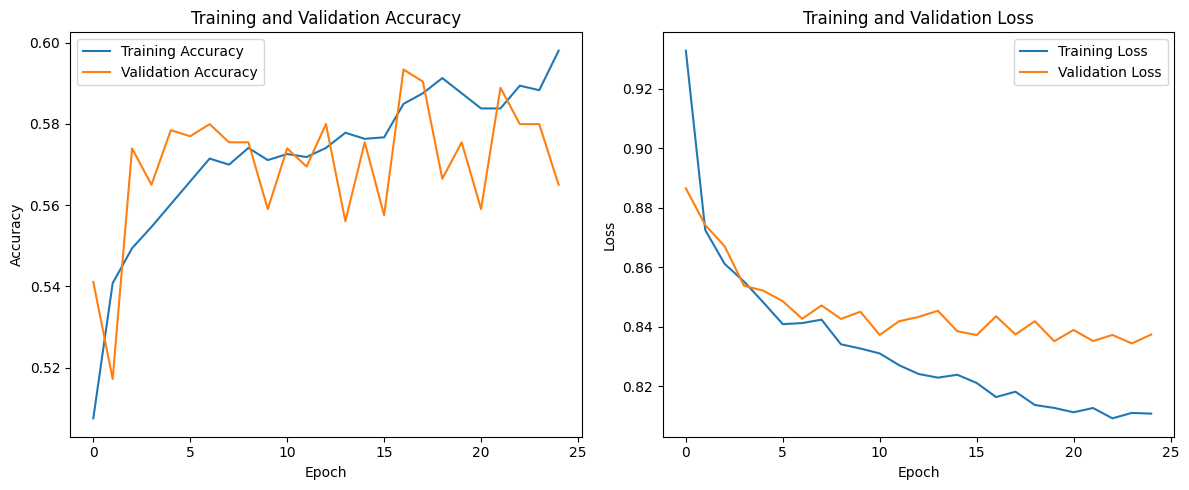

In [ ]:
# Traning Accuracy and Loss Visualization
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(history_neural.history['accuracy'], label='Training Accuracy')
plt.plot(history_neural.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_neural.history['loss'], label='Training Loss')
plt.plot(history_neural.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Prediction
y_pred_proba_neural = neural_model.predict(X_test)
y_pred_neural = np.argmax(y_pred_proba_neural, axis=1)
true_labels = np.argmax(y_test_categ, axis=1)

# Evaluation
neural_report = classification_report(true_labels, y_pred_neural, target_names = label_encoder.classes_)
log_loss_neural, accuracy_neural = neural_model.evaluate(X_test, y_test_categ)

# Results
print('Neural Network Evaluation\n')
print(neural_report)
print(f'Accuracy: {accuracy_neural}\nLog Loss: {log_loss_neural}')

27/27 [==============================] - 0s 4ms/step - loss: 0.8292 - accuracy: 0.5694
Neural Network Evaluation

              precision    recall  f1-score   support

           F       0.48      0.24      0.32       262
           I       0.74      0.80      0.77       267
           M       0.48      0.65      0.55       307

    accuracy                           0.57       836
   macro avg       0.57      0.56      0.55       836
weighted avg       0.56      0.57      0.55       836

Accuracy: 0.5693780183792114
Log Loss: 0.8292269110679626


## Model Selection

#### ROC Curve

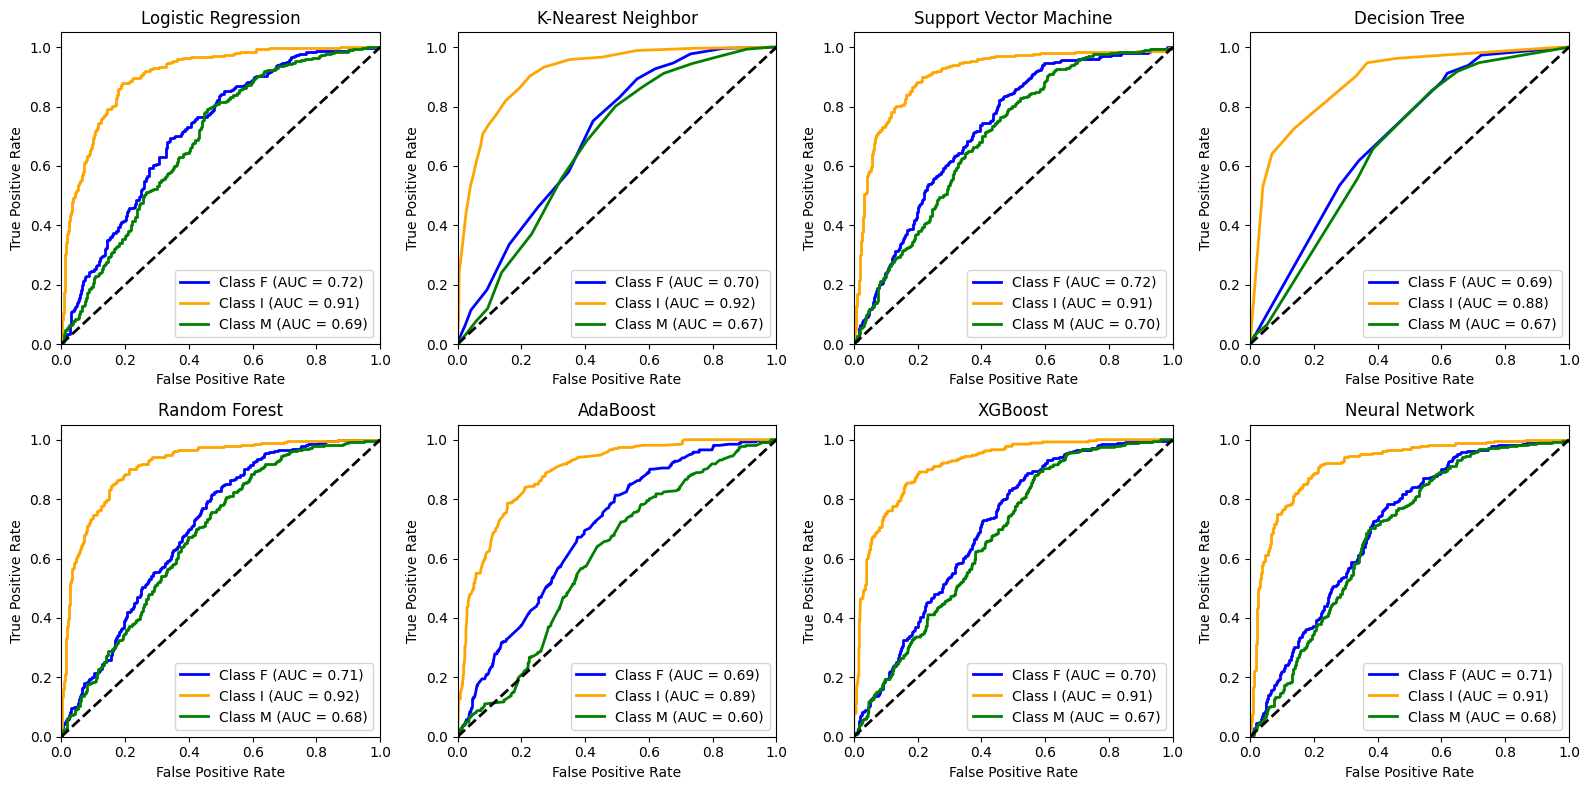

In [ ]:
# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])

# Setup plot
fig, ax = plt.subplots(2, 4, figsize=(16, 8))
ax = ax.ravel()
colors = cycle(['blue', 'orange', 'green'])
model_predictions = [
    (y_pred_proba_lr, 'Logistic Regression'),
    (y_pred_proba_knn, 'K-Nearest Neighbor'),
    (y_pred_proba_svm, 'Support Vector Machine'),
    (y_pred_proba_dt, 'Decision Tree'),
    (y_pred_proba_rf, 'Random Forest'),
    (y_pred_proba_ab, 'AdaBoost'),
    (y_pred_proba_xgb, 'XGBoost'),
    (y_pred_proba_neural, 'Neural Network')
]

# Plot ROC curve for each class of each model
for i, (model_proba, title) in enumerate(model_predictions):
    for j, color in zip(range(3), colors):
        fpr, tpr, _ = roc_curve(y_test_binarized[:, j], model_proba[:, j])
        roc_auc = auc(fpr, tpr)
        ax[i].plot(fpr, tpr, color=color, lw=2,
                   label=f'Class {label_encoder.classes_[j]} (AUC = {roc_auc:.2f})')

    ax[i].plot([0, 1], [0, 1], 'k--', lw=2)
    ax[i].set_xlim([0.0, 1.0])
    ax[i].set_ylim([0.0, 1.05])
    ax[i].set_xlabel('False Positive Rate')
    ax[i].set_ylabel('True Positive Rate')
    ax[i].set_title(title)
    ax[i].legend(loc="lower right")

# Display the plot
plt.tight_layout()
plt.show()

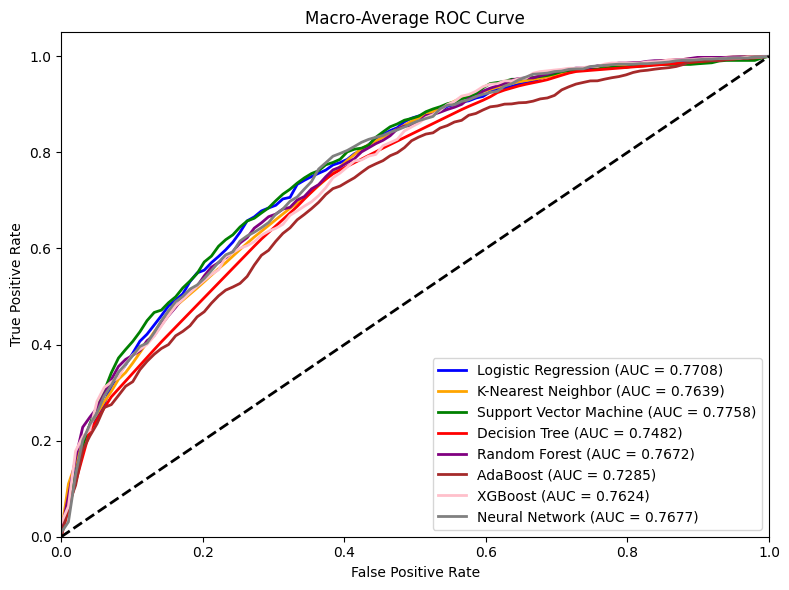

In [ ]:
# Macro-Average ROC Curve for Comparison
fig, ax = plt.subplots(figsize=(8, 6))
colors = cycle(['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray'])

# Calculate and plot macro-average ROC curve and ROC area for each model
for model_proba, title in model_predictions:
    all_fpr = np.linspace(0, 1, 100)
    mean_tpr = np.zeros_like(all_fpr)
    num_classes = y_test_binarized.shape[1]

    for i in range(num_classes):
        fpr, tpr, _ = roc_curve(y_test_binarized[:, i], model_proba[:, i])
        mean_tpr += np.interp(all_fpr, fpr, tpr)

    mean_tpr /= num_classes
    roc_auc = auc(all_fpr, mean_tpr)
    ax.plot(all_fpr, mean_tpr, color=next(colors), lw=2, label=f'{title} (AUC = {roc_auc:.4f})')

ax.plot([0, 1], [0, 1], 'k--', lw=2)
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Macro-Average ROC Curve')
ax.legend(loc="lower right")

# Display the plot
plt.tight_layout()
plt.show()

#### Performance Metrics

We use the macro-average method to calculate performance metrics for multi-class classification.

In [ ]:
# Model names
model = ['Logistic Regression', 'K-Nearest Neighbor', 'Support Vector Machine',
         'Decision Tree', 'Random Forest', 'AdaBoost', 'XGBoost', 'Neural Network']

# Performance metrics
performance = {
    'Accuracy': [accuracy_lr, accuracy_knn, accuracy_svm, accuracy_dt,
                 accuracy_rf, accuracy_ab, accuracy_xgb, accuracy_neural],
    'Log Loss': [log_loss_lr, log_loss_knn, log_loss_svm, log_loss_dt,
                 log_loss_rf, log_loss_ab, log_loss_xgb, log_loss_neural],
    'ROC AUC': [
        roc_auc_score(y_test, y_pred_proba_lr, multi_class='ovr', average='macro'),
        roc_auc_score(y_test, y_pred_proba_knn, multi_class='ovr', average='macro'),
        roc_auc_score(y_test, y_pred_proba_svm, multi_class='ovr', average='macro'),
        roc_auc_score(y_test, y_pred_proba_dt, multi_class='ovr', average='macro'),
        roc_auc_score(y_test, y_pred_proba_rf, multi_class='ovr', average='macro'),
        roc_auc_score(y_test, y_pred_proba_ab, multi_class='ovr', average='macro'),
        roc_auc_score(y_test, y_pred_proba_xgb, multi_class='ovr', average='macro'),
        roc_auc_score(y_test, y_pred_proba_neural, multi_class='ovr', average='macro')
    ],
    'Precision': [
        precision_score(y_test, y_pred_lr, average='macro'),
        precision_score(y_test, y_pred_knn, average='macro'),
        precision_score(y_test, y_pred_svm, average='macro'),
        precision_score(y_test, y_pred_dt, average='macro'),
        precision_score(y_test, y_pred_rf, average='macro'),
        precision_score(y_test, y_pred_ab, average='macro'),
        precision_score(y_test, y_pred_xgb, average='macro'),
        precision_score(y_test, y_pred_neural, average='macro')
    ],
    'Recall': [
        recall_score(y_test, y_pred_lr, average='macro'),
        recall_score(y_test, y_pred_knn, average='macro'),
        recall_score(y_test, y_pred_svm, average='macro'),
        recall_score(y_test, y_pred_dt, average='macro'),
        recall_score(y_test, y_pred_rf, average='macro'),
        recall_score(y_test, y_pred_ab, average='macro'),
        recall_score(y_test, y_pred_xgb, average='macro'),
        recall_score(y_test, y_pred_neural, average='macro')
    ],
    'F1 Score (macro)': [
        f1_score(y_test, y_pred_lr, average='macro'),
        f1_score(y_test, y_pred_knn, average='macro'),
        f1_score(y_test, y_pred_svm, average='macro'),
        f1_score(y_test, y_pred_dt, average='macro'),
        f1_score(y_test, y_pred_rf, average='macro'),
        f1_score(y_test, y_pred_ab, average='macro'),
        f1_score(y_test, y_pred_xgb, average='macro'),
        f1_score(y_test, y_pred_neural, average='macro')
    ],
    'F1 Score (micro)': [
        f1_score(y_test, y_pred_lr, average='micro'),
        f1_score(y_test, y_pred_knn, average='micro'),
        f1_score(y_test, y_pred_svm, average='micro'),
        f1_score(y_test, y_pred_dt, average='micro'),
        f1_score(y_test, y_pred_rf, average='micro'),
        f1_score(y_test, y_pred_ab, average='micro'),
        f1_score(y_test, y_pred_xgb, average='micro'),
        f1_score(y_test, y_pred_neural, average='micro')
    ],
    'F1 Score (weighted)': [
        f1_score(y_test, y_pred_lr, average='weighted'),
        f1_score(y_test, y_pred_knn, average='weighted'),
        f1_score(y_test, y_pred_svm, average='weighted'),
        f1_score(y_test, y_pred_dt, average='weighted'),
        f1_score(y_test, y_pred_rf, average='weighted'),
        f1_score(y_test, y_pred_ab, average='weighted'),
        f1_score(y_test, y_pred_xgb, average='weighted'),
        f1_score(y_test, y_pred_neural, average='weighted')
    ]
}

performance_df = pd.DataFrame(performance, index=model).sort_values(by=['Accuracy'], ascending=False)
print(performance_df)

                        Accuracy  Log Loss   ROC AUC  Precision    Recall  \
Logistic Regression     0.583732  0.833277  0.771102   0.570435  0.586083   
Neural Network          0.569378  0.829227  0.768114   0.565663  0.563388   
Support Vector Machine  0.566986  0.829008  0.775714   0.558809  0.564593   
AdaBoost                0.562201  1.066581  0.728574   0.554402  0.559925   
K-Nearest Neighbor      0.558612  0.900837  0.763958   0.551798  0.565432   
Random Forest           0.558612  0.823509  0.767306   0.553682  0.559469   
XGBoost                 0.549043  0.828633  0.762162   0.545122  0.550410   
Decision Tree           0.532297  0.851787  0.748187   0.533134  0.540835   

                        F1 Score (macro)  F1 Score (micro)  \
Logistic Regression             0.572013          0.583732   
Neural Network                  0.546549          0.569378   
Support Vector Machine          0.549937          0.566986   
AdaBoost                        0.542315          0.562201

**Logistics Regression** is the best model based on the performance metrics.

## Feature Evaluation

In [ ]:
# Convert X_train, X_test to dataframe for LIME and SHAP
X_train_df = pd.DataFrame(X_train, columns=abalone.drop('Sex', axis=1).columns)
X_test_df = pd.DataFrame(X_test, columns=abalone.drop('Sex', axis=1).columns)

#### LIME

In [ ]:
# Create a LIME explainer
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data = X_train_df.values,
    feature_names = X_train_df.columns.tolist(),
    class_names = label_encoder.classes_,
    mode = 'classification'
)

# LIME Explaination
indices = np.random.randint(0, X_test_df.shape[0], size=3)
for i in indices:
    explanation = lime_explainer.explain_instance(X_test_df.values[i], lr_model.predict_proba, num_features=len(X_train_df.columns))
    explanation.show_in_notebook(show_table=True, show_all=False)

In [ ]:
n = X_test_df.shape[0] # sample size
feature_score_lime = {feature: 0 for feature in X_train_df.columns}

for i in range(n):
  explanation = lime_explainer.explain_instance(X_test_df.values[i], lr_model.predict_proba, num_features=len(X_train_df.columns))
  exp_list = explanation.as_list()

  for tup in exp_list:
    feature, score = tup[0], tup[1]

    # Get total influential score for each feature
    for key, value in feature_score_lime.items():
      if key in feature:
        feature_score_lime[key] += abs(score)

# Get average influential value
for key, value in feature_score_lime.items():
  feature_score_lime[key] /= n

# Sort the dictionary by values
sorted_feature_lime = sorted(feature_score_lime.items(), key=lambda x: x[1])

# Create a DataFrame to display the result
df_feature_lime = pd.DataFrame(sorted_feature_lime, columns=['Feature', 'Score'])
print(df_feature_lime)

          Feature     Score
0  Shucked weight  0.016641
1    Shell weight  0.038288
2          Height  0.039945
3           Rings  0.055014
4        Diameter  0.117934
5  Viscera weight  0.140686
6    Whole weight  0.207535
7          Length  0.244304


#### SHAP

In [ ]:
# Initialize Explainer
shap_explainer = shap.LinearExplainer(lr_model, X_train_df)

# Compute SHAP values for the test set
shap_values = shap_explainer.shap_values(X_test_df)

# Randomly select 3 indices
indices = np.random.choice(X_test_df.shape[0], size=3, replace=False)

for i in indices:
    shap.initjs()
    print(f"Index: {i}")

    for class_index in range(shap_values.shape[2]):  # Loop through each class
        explainer_value = shap_explainer.expected_value[class_index]
        shap_values_class = shap_values[i, :, class_index]

        # Display the SHAP force plot for each class for the selected instance
        print(f"Class Index: {class_index}")
        plot = shap.force_plot(explainer_value, shap_values_class, X_test_df.iloc[i, :], link="logit", show = False)
        display(plot)

Index: 659
Class Index: 0


Class Index: 1


Class Index: 2


Index: 110
Class Index: 0


Class Index: 1


Class Index: 2


Index: 119
Class Index: 0


Class Index: 1


Class Index: 2


**General Interpretation**\
f(x): The base value, which indicates the average model output (probability) over the training set for certain class.\
Red arrows: Indicate feature values that push the prediction higher than the base value for a given class.\
Blue arrows: Indicate feature values that pull the prediction lower than the base value for that class.\
Length of arrows: Represents the magnitude of the feature's contribution to the prediction.\
Position of the feature label: Indicates the actual value of that feature for the instance being explained.\
The output value for the prediction is the final position on the x-axis after all the feature contributions have been taken into account. If it is greater than the base value, the model predicts that this instance is more likely to be in that class; if it is less, it predicts it is less likely to be in the class.

In [ ]:
# Convert the list of SHAP values for each class into an array
shap_values_array = np.stack(shap_values, axis=1)

# Compute the mean of the absolute SHAP values across the selected instances for each feature
mean_abs_shap_values = np.abs(shap_values_array).mean(axis=0)
if mean_abs_shap_values.ndim > 1:
    mean_abs_shap_values = mean_abs_shap_values.mean(axis=1)

# Create a dictionary for feature scores
feature_score_shap = {feature: mean_abs_shap_values[idx] for idx, feature in enumerate(X_train_df.columns)}
sorted_feature_shap = sorted(feature_score_shap.items(), key=lambda x: x[1])

# Create a DataFrame to display the result
df_feature_shap = pd.DataFrame(sorted_feature_shap, columns=['Feature', 'Score'])
print(df_feature_shap)

          Feature     Score
0        Diameter  0.099090
1          Height  0.156116
2          Length  0.224132
3  Viscera weight  0.268755
4    Shell weight  0.281201
5  Shucked weight  0.311577
6           Rings  0.316782
7    Whole weight  0.323024


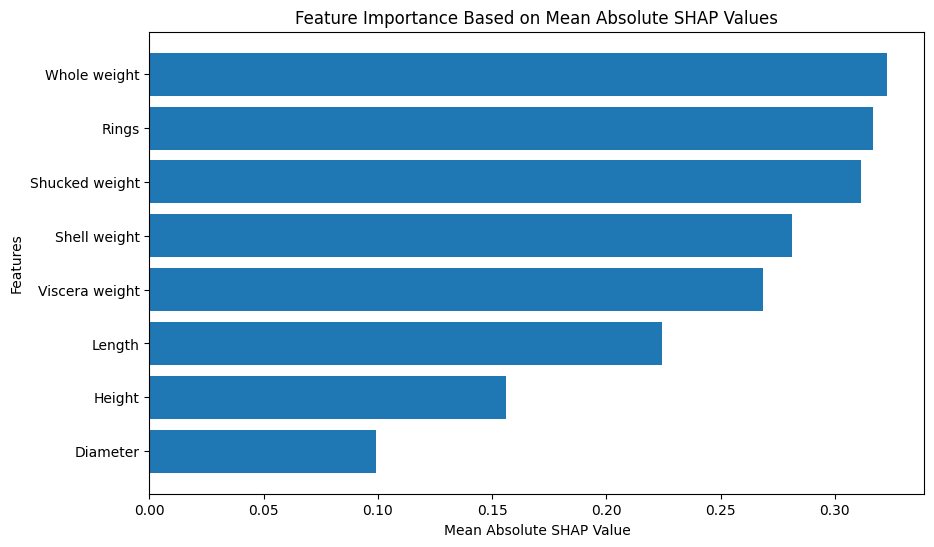

In [ ]:
if mean_abs_shap_values.ndim > 1:
    mean_abs_shap_values = mean_abs_shap_values.mean(axis=1)

# Sort the feature importances by their mean absolute SHAP values
feature_score_shap = {feature: mean_abs_shap_values[idx] for idx, feature in enumerate(X_train_df.columns)}
sorted_feature_importances = sorted(feature_score_shap.items(), key=lambda x: x[1], reverse=True)

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_importances)), [score for feature, score in sorted_feature_importances], tick_label=[feature for feature, score in sorted_feature_importances])
plt.xlabel('Mean Absolute SHAP Value')
plt.ylabel('Features')
plt.title('Feature Importance Based on Mean Absolute SHAP Values')
plt.gca().invert_yaxis()  # most important feature at the top
plt.show()

## Model Optimization

#### After LIME

In [ ]:
# Drop non-influential features
drop_features_lime = ['Shucked weight']
X_train_lime = X_train_df.drop(columns = drop_features_lime)
X_test_lime = X_test_df.drop(columns = drop_features_lime)

# Logistic Regression
lime_model = LogisticRegression(random_state=42)
lime_model.fit(X_train_lime, y_train)

# Evaluation
y_pred_lime = lime_model.predict(X_test_lime)
y_pred_proba_lime = lime_model.predict_proba(X_test_lime)
lime_report = classification_report(y_test, y_pred_lime, target_names = label_encoder.classes_)
accuracy_lime = accuracy_score(y_test, y_pred_lime)
log_loss_lime = log_loss(y_test, y_pred_proba_lime)

# Results
print('Logistics Regression Evaluation (LIME)\n')
print(lime_report)
print(f'Accuracy: {accuracy_lime}\nLog Loss: {log_loss_lime}')

Logistics Regression Evaluation (LIME)

              precision    recall  f1-score   support

           F       0.49      0.35      0.41       262
           I       0.68      0.87      0.76       267
           M       0.51      0.51      0.51       307

    accuracy                           0.57       836
   macro avg       0.56      0.58      0.56       836
weighted avg       0.56      0.57      0.56       836

Accuracy: 0.5741626794258373
Log Loss: 0.8341565264697776


#### After SHAP

In [ ]:
# Drop the identified non-influential features from the training and test sets
drop_features_shap = ['Diameter']
X_train_shap = X_train_df.drop(columns=drop_features_shap)
X_test_shap = X_test_df.drop(columns=drop_features_shap)

# Fit the model on the reduced feature set
shap_model = LogisticRegression(random_state=42)
shap_model.fit(X_train_shap, y_train)

# Make predictions with the updated model on the reduced feature test set
y_pred_shap = shap_model.predict(X_test_shap)
y_pred_proba_shap = shap_model.predict_proba(X_test_shap)

# Generate a classification report
shap_report = classification_report(y_test, y_pred_shap, target_names=label_encoder.classes_)

# Calculate accuracy and log loss
accuracy_shap = accuracy_score(y_test, y_pred_shap)
log_loss_shap = log_loss(y_test, y_pred_proba_shap)

# Print results
print('Logistic Regression Evaluation (SHAP-Informed Model)\n')
print(shap_report)
print(f'Accuracy: {accuracy_shap}\nLog Loss: {log_loss_shap}')

Logistic Regression Evaluation (SHAP-Informed Model)

              precision    recall  f1-score   support

           F       0.51      0.36      0.42       262
           I       0.68      0.87      0.76       267
           M       0.51      0.51      0.51       307

    accuracy                           0.58       836
   macro avg       0.57      0.58      0.56       836
weighted avg       0.56      0.58      0.56       836

Accuracy: 0.5789473684210527
Log Loss: 0.8288468156905159


## Comparison

#### ROC Curve

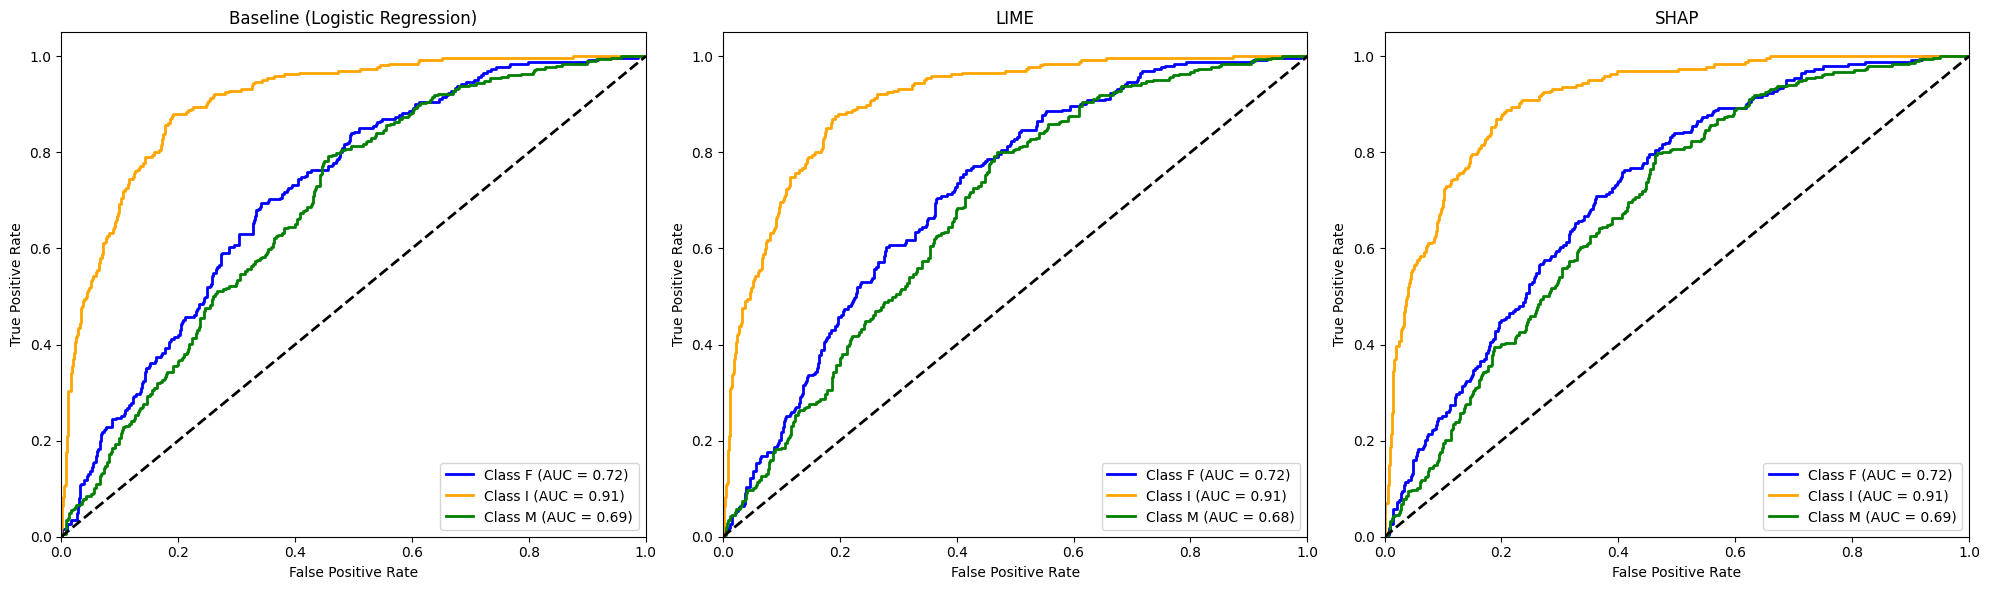

In [ ]:
# Setup plot
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
colors = cycle(['blue', 'orange', 'green'])
eml_predictions = [
    (y_pred_proba_lr, 'Baseline (Logistic Regression)'),
    (y_pred_proba_lime, 'LIME'),
    (y_pred_proba_shap, 'SHAP')
]

# Plot ROC curve for each class of each model
for i, (model_proba, title) in enumerate(eml_predictions):
    for j, color in zip(range(3), colors):
        fpr, tpr, _ = roc_curve(y_test_binarized[:, j], model_proba[:, j])
        roc_auc = auc(fpr, tpr)
        ax[i].plot(fpr, tpr, color=color, lw=2,
                   label=f'Class {label_encoder.classes_[j]} (AUC = {roc_auc:.2f})')

    ax[i].plot([0, 1], [0, 1], 'k--', lw=2)
    ax[i].set_xlim([0.0, 1.0])
    ax[i].set_ylim([0.0, 1.05])
    ax[i].set_xlabel('False Positive Rate')
    ax[i].set_ylabel('True Positive Rate')
    ax[i].set_title(title)
    ax[i].legend(loc="lower right")

# Display the plot
plt.tight_layout()
plt.show()

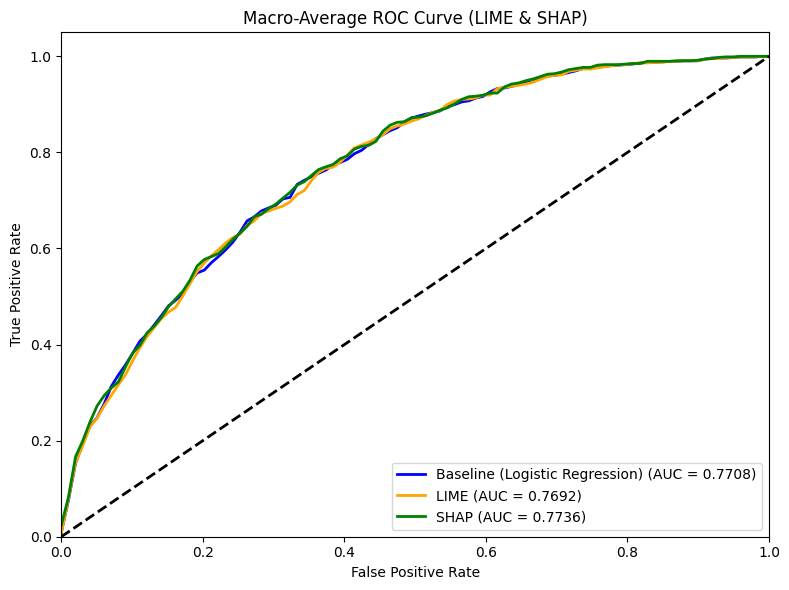

In [ ]:
# Macro-Average ROC Curve for Comparison
fig, ax = plt.subplots(figsize=(8, 6))
colors = cycle(['blue', 'orange', 'green'])

# Calculate and plot macro-average ROC curve and ROC area for each model
for model_proba, title in eml_predictions:
    all_fpr = np.linspace(0, 1, 100)
    mean_tpr = np.zeros_like(all_fpr)
    num_classes = y_test_binarized.shape[1]

    for i in range(num_classes):
        fpr, tpr, _ = roc_curve(y_test_binarized[:, i], model_proba[:, i])
        mean_tpr += np.interp(all_fpr, fpr, tpr)

    mean_tpr /= num_classes
    roc_auc = auc(all_fpr, mean_tpr)
    ax.plot(all_fpr, mean_tpr, color=next(colors), lw=2, label=f'{title} (AUC = {roc_auc:.4f})')

ax.plot([0, 1], [0, 1], 'k--', lw=2)
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Macro-Average ROC Curve (LIME & SHAP)')
ax.legend(loc="lower right")

# Display the plot
plt.tight_layout()
plt.show()

#### Performance Metrics

In [ ]:
# Index
eml_index = ['Baseline (Logistic Regression)', 'LIME', 'SHAP']

# Performance metrics
performance_eml = {
    'Accuracy': [accuracy_lr, accuracy_lime, accuracy_shap],
    'Log Loss': [log_loss_lr, log_loss_lime, log_loss_shap],
    'ROC AUC': [
        roc_auc_score(y_test, y_pred_proba_lr, multi_class='ovr', average='macro'),
        roc_auc_score(y_test, y_pred_proba_lime, multi_class='ovr', average='macro'),
        roc_auc_score(y_test, y_pred_proba_shap, multi_class='ovr', average='macro')
    ],
    'Precision': [
        precision_score(y_test, y_pred_lr, average='macro'),
        precision_score(y_test, y_pred_lime, average='macro'),
        precision_score(y_test, y_pred_shap, average='macro')
    ],
    'Recall': [
        recall_score(y_test, y_pred_lr, average='macro'),
        recall_score(y_test, y_pred_lime, average='macro'),
        recall_score(y_test, y_pred_shap, average='macro')
    ],
    'F1 Score (macro)': [
        f1_score(y_test, y_pred_lr, average='macro'),
        f1_score(y_test, y_pred_lime, average='macro'),
        f1_score(y_test, y_pred_shap, average='macro')
    ],
    'F1 Score (micro)': [
        f1_score(y_test, y_pred_lr, average='micro'),
        f1_score(y_test, y_pred_lime, average='micro'),
        f1_score(y_test, y_pred_shap, average='micro')
    ],
    'F1 Score (weighted)': [
        f1_score(y_test, y_pred_lr, average='weighted'),
        f1_score(y_test, y_pred_lime, average='weighted'),
        f1_score(y_test, y_pred_shap, average='weighted')
    ]
}

eml_compare = pd.DataFrame(performance_eml, index=eml_index).sort_values(by=['Accuracy'], ascending=False)
print(eml_compare)

                                Accuracy  Log Loss   ROC AUC  Precision  \
Baseline (Logistic Regression)  0.583732  0.833277  0.771102   0.570435   
SHAP                            0.578947  0.828847  0.773467   0.565473   
LIME                            0.574163  0.834157  0.769296   0.559906   

                                  Recall  F1 Score (macro)  F1 Score (micro)  \
Baseline (Logistic Regression)  0.586083          0.572013          0.583732   
SHAP                            0.580783          0.564986          0.578947   
LIME                            0.575718          0.560012          0.574163   

                                F1 Score (weighted)  
Baseline (Logistic Regression)             0.570221  
SHAP                                       0.563447  
LIME                                       0.558557  


## Summary Plot

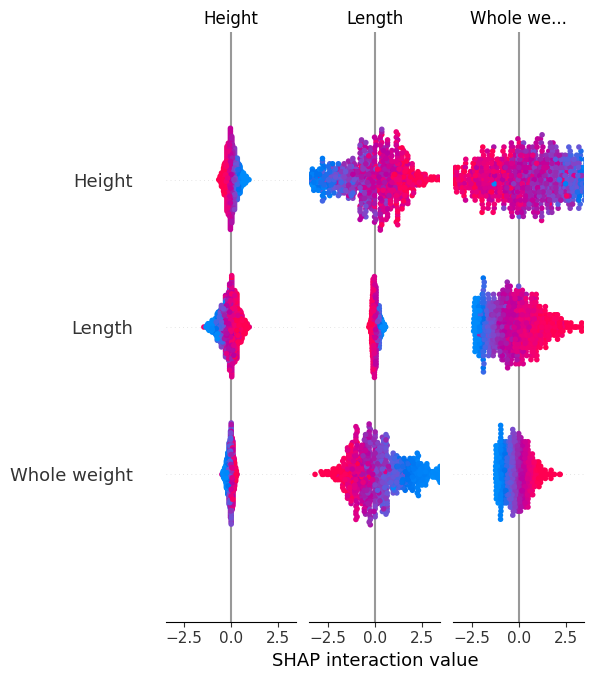

In [ ]:
class SHAPModelEvaluator:
    def __init__(self, model, X_train_df, X_test_df, y_train, drop_features):
        self.model = model
        self.X_train_df = X_train_df
        self.X_test_df = X_test_df
        self.y_train = y_train
        self.drop_features = drop_features

    def generate_summary_plot(self):
        # Reduce the feature set based on SHAP feature importance
        X_train_shap = self.X_train_df.drop(columns=self.drop_features)
        X_test_shap = self.X_test_df.drop(columns=self.drop_features)

        # Fit the model on the reduced feature set
        self.model.fit(X_train_shap, self.y_train)

        # Create a SHAP explainer
        explainer = shap.LinearExplainer(self.model, X_train_shap) # for logistics regression

        # Calculate SHAP values for the test set
        shap_values = explainer.shap_values(X_test_shap)

        # Generate summary plot
        shap.summary_plot(shap_values, X_test_shap)

evaluator = SHAPModelEvaluator(shap_model, X_train_df, X_test_df, y_train, drop_features_shap)

# Generate and display the summary plot
evaluator.generate_summary_plot()